### Unit 5: Hypothesis Testing & Confidence Intervals - Heart Disease Data

Kyle P. Rasku MS BSN RN


In [2]:
%matplotlib inline
import matplotlib.pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))
import pandas as pd
import numpy as np
import datetime
import math

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [4]:
# Refreshing our memory on the data points in the heart disease dataset

vdesc = pd.DataFrame(heart_disease.variables)
vdesc

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [5]:
heart = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
heart_backup = heart.copy()
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
for c in categorical_columns:
    heart[c] = pd.Categorical(heart[c])

In [7]:
heart_categorical = heart[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].copy()
heart_continuous = heart[["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"]].copy()

In [8]:
heart_categorical.describe()

,sex,cp,fbs,restecg,exang,slope,thal
count,303,303,303,303,303,303,301.0
unique,2,4,2,3,2,3,3.0
top,1,4,0,0,0,1,3.0
freq,206,144,258,151,204,142,166.0


In [9]:
heart_continuous.describe()

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
# Add IQR, variance and range
heart_summary = heart_continuous.describe().transpose()

heart_summary["IQR"] = heart_summary["75%"] - heart_summary["25%"]
heart_summary["range"] = heart_summary["max"] - heart_summary["min"]
heart_summary["var"] = heart_summary["std"]*heart_summary["std"]

heart_summary = heart_summary.transpose()
heart_summary

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000
IQR,13.000000,20.000000,64.000000,32.500000,1.600000,1.000000,2.000000
range,48.000000,106.000000,438.000000,131.000000,6.200000,3.000000,4.000000


In [11]:
#divide data into male vs. female sets

males = heart[heart["sex"]==1].copy()
females = heart[heart["sex"]==0].copy()

males.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [12]:
females.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
18,48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0


In [13]:
print(males.shape)
print(females.shape)

(206, 14)
(97, 14)


### Power calculation (aka 'sensitivity')

How many rows do I need for 80% power, and what does that mean?

**It is important to perform this step BEFORE hypothesis testing, otherwise, I don't really know if I can be reasonably certain of my conclusions.**

The statistical power of a study (sometimes called sensitivity) is **how likely the study is to distinguish an actual effect from one caused by random chance**. 

As the power increases, the probability of making a Type II error decreases.
Type II error is when we fail to reject the NULL hypothesis when it is false; also called a 'false negative'.
Beta is the maximum probability of a Type II (false negative) error. 

Power = 1 - Beta

**To increase the power of a test, you may do any of the following:**

- Increase the effect size (the difference between the null and alternative values) to be detected
- Increase the sample size(s)
- Decrease the variability in the sample(s)
- Increase the significance level (alpha) of the test 

### P-value - the probability of a Type I error

- Probability of Type I error: probability of rejecting the NULL hypothesis when it is true.
- Probability of observing the result given that the null hypothesis is true.
- Probability of obtaining a result **equal to or more extreme than was observed in the data**.
- The result of a significance test is claimed to be “statistically significant” if the p-value is less than the significance level (alpha). This means that the null hypothesis (that there is no result) is rejected.

#### Summary:

- p <= alpha: reject H0, different distribution.
- p > alpha: fail to reject H0, same distribution.
- Significance level (alpha): Boundary for specifying a statistically significant finding when interpreting the p-value.

### Hypothesis Testing

There must be a hypothesis to test, for power and statistical significance to matter.

For example, the NULL hypothesis (H0) for the Pearson’s Correlation test is that **there is no relationship between two variables**. 

The NULL hypothesis (H0) for the Student’s t test is that **there is no difference between the means of two populations**.

Let's try:
1. Calculating power
2. Setting alpha
3. Stating hypotheses 
4. Conducting a test

In [14]:
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

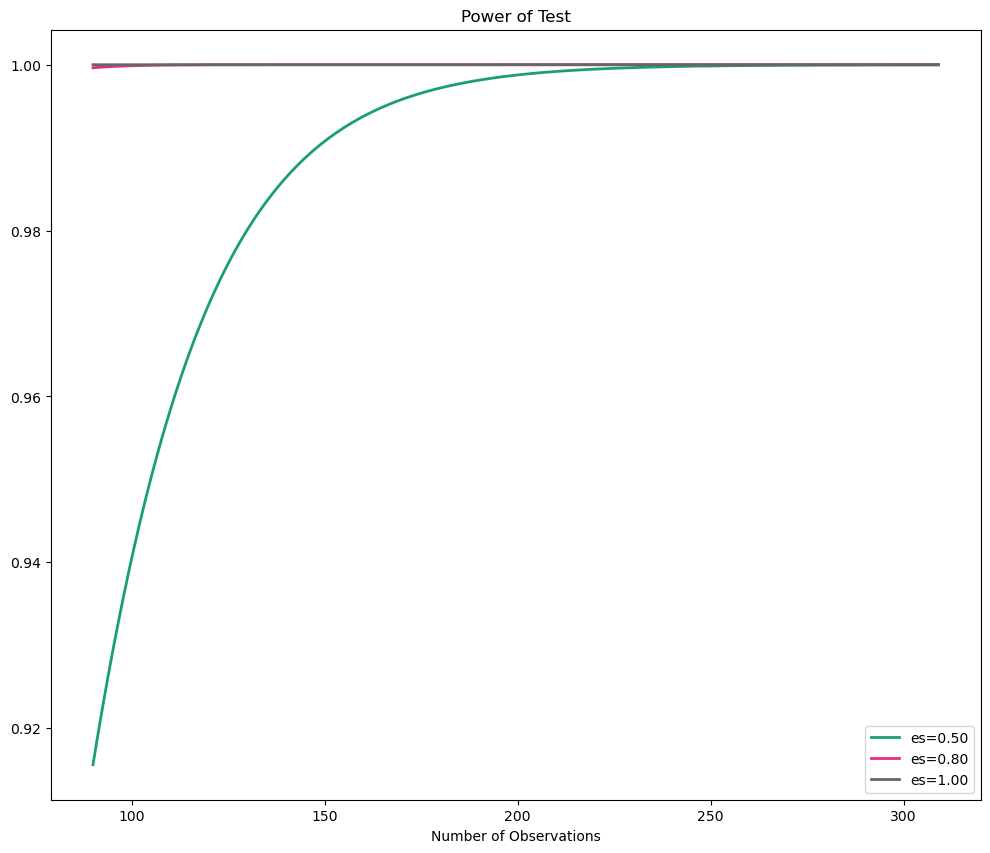

In [15]:
# Power curves for a Correlation test: age x chol

effect_sizes = np.array([0.5, 0.8, 1.0])
sample_sizes = np.array(range(90, 310))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

In [18]:
heart_summary.at["IQR", "age"]

13.0

In [19]:
# Select data and remove outliers using IQR

agechol_df = heart[(heart["chol"].notnull()) & (heart["chol"]< heart_summary.at["50%", "chol"] + 1.5*heart_summary.at["IQR", "chol"]) & 
            (heart["chol"]> heart_summary.at["50%", "chol"] - 1.5*heart_summary.at["IQR", "chol"])][["age", "chol"]].reset_index()

agechol_df = agechol_df.drop(columns=["index"], axis=1)
age = agechol_df["age"]
chol = agechol_df["chol"]

print(age.shape)
print(chol.shape)

(289,)
(289,)


14 rows were removed.

In [20]:
from statsmodels.stats.power import TTestPower

# Exact power for Correlation test with 148 instances

power = TTestPower()
n_test = power.solve_power(nobs=289, effect_size = 0.8,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


In [21]:
# Great!  Looks like we have sufficient power.  First, we'll set alpha to 0.05...

# H0: There is no significant relationship between age and chol
# HA: There is a significant relationship between age and chol at alpha=0.05

import scipy.stats as stats

r = stats.pearsonr(age, chol)
print(r)

PearsonRResult(statistic=0.17848954916859533, pvalue=0.002321656222449241)


At alpha of 0.05 / the 95% confidence interval, there is a 5% chance of a Type I error.

However after calculating the Pearson R value, we see that at this level, there is a statistically significant relationship between age and cholesterol level.  At this level, we would reject the NULL hypothesis, but there's a 5% chance that we did this in error.

In medicine, alpha of 0.05 often doesn't provide enough certainty of true efficacy.  We don't want to reject the NULL unless we have solid evidence.  If we chose an alpha of 0.01 we would then have only a 1% chance of rejecting NULL in error, and if we selected alpha of 0.001, then, we would have a .1% chance of Type I error.

At alpha of 0.01, the relationship between age and cholesterol level is still statistically significant; however, if we decrease alpha again to 0.001, the p-value of 0.002321 is now greater than this significance level.  Therefore, we can be 95% or 99% confident that there is a true relationship between age and cholesterol level, but we cannot be 99.9% confident.

### Pearson correlation

Based on the output, we can see that there is a weak positive correlation between age and cholesterol (0.18), and that relationship is statistically significant at alpha=0.05, with a p-value of 0.0017!



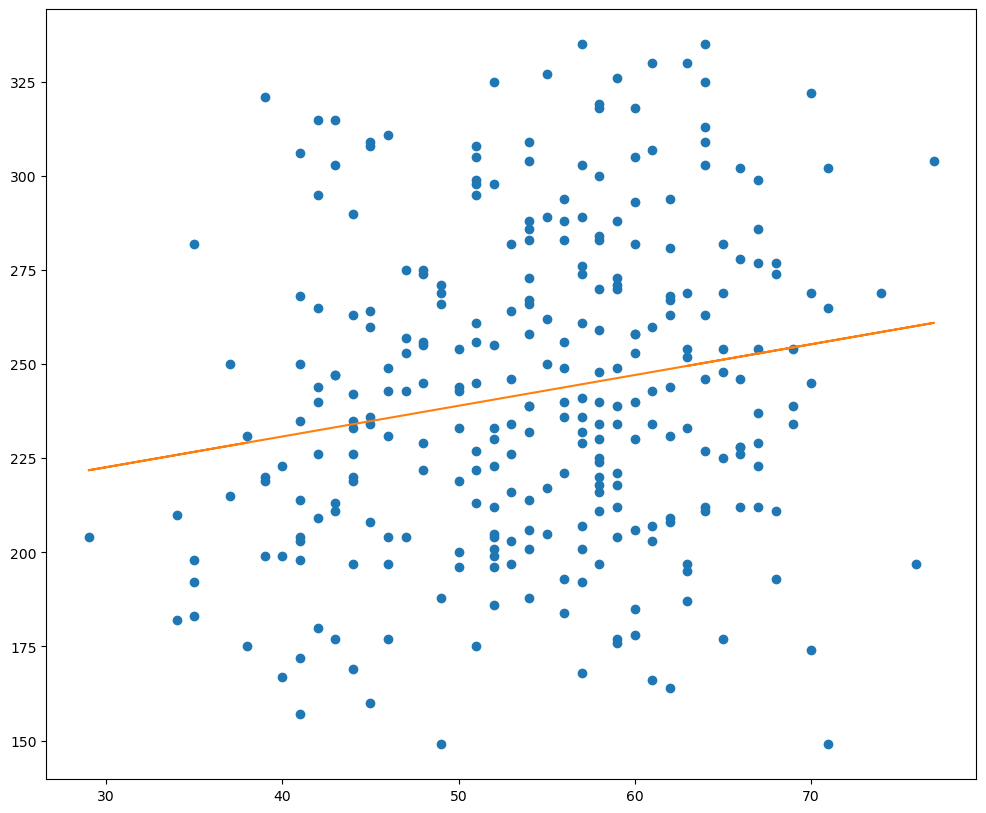

In [22]:
plt.plot(age, chol, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(age, chol, 1)

#add linear regression line to scatterplot 
plt.plot(age, m*age+b)

### Student's T-test

Now, let's perform a student's T test on males vs. females, to see if there is a statistically significant difference in trtbps - resting blood pressure on admission in mmHg.

H0: There is no difference in mean trestbps between males and females.

HA: There is a statistically significant difference at alpha=0.05.

In [23]:
ratio = females.shape[0]/males.shape[0]
print(ratio)

0.470873786407767


In [24]:
# Calculate power

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=ratio, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 39.658


In [26]:
# The minimum # of samples for 80% power is 40, so we are all set!

# Let's see what type of T-test we need to use

f_desc = females.describe()
f_mct = f_desc.transpose()

f_mct["IQR"] = f_mct["75%"] - f_mct["25%"]
f_mct["range"] = f_mct["max"] - f_mct["min"]
f_mct["var"] = f_mct["std"]*f_mct["std"]

m_desc = males.describe()
m_mct = m_desc.transpose()

m_mct["IQR"] = m_mct["75%"] - m_mct["25%"]
m_mct["range"] = m_mct["max"] - m_mct["min"]
m_mct["var"] = m_mct["std"]*m_mct["std"]

f_mct.loc["trestbps"]

count     97.000000
mean     133.340206
std       19.376149
min       94.000000
25%      120.000000
50%      132.000000
75%      140.000000
max      200.000000
IQR       20.000000
range    106.000000
var      375.435137
Name: trestbps, dtype: float64

In [27]:
m_mct.loc["trestbps"]

count    206.000000
mean     130.912621
std       16.691524
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      192.000000
IQR       20.000000
range     98.000000
var      278.606962
Name: trestbps, dtype: float64

In [28]:
# Variances are unequal, so we will use Welch's test

stats.ttest_ind(males["trestbps"], females["trestbps"], equal_var=False)

Ttest_indResult(statistic=-1.0622273145438155, pvalue=0.2896813792526513)

We can accept the NULL hypothesis that average resting blood pressures on admission are **NOT** significantly different  between males and females at alpha=0.05.

 